In [1]:
import os
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

# import warnings
# warnings.filterwarnings("ignore")




In [2]:
alldata = pd.read_csv('./Resources/water_potability.csv')
alldata.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [3]:
alldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [4]:
alldata.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [5]:
alldata.tail()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1
3275,7.874671,195.102299,17404.177061,7.509306,NaN,327.459760,16.140368,78.698446,2.309149,1


In [6]:
alldata.shape

(3276, 10)

In [7]:
alldata.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [8]:
alldata['ph'] = alldata['ph'].fillna(0)
alldata['Sulfate'] = alldata['Sulfate'].fillna(0)
alldata['Trihalomethanes'] = alldata['Trihalomethanes'].fillna(0)

In [9]:
alldata.shape

(3276, 10)

In [10]:
alldata.Potability.value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

In [11]:
alldata.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

In [12]:
model_df = alldata.rename(columns={'Hardness': 'Hd', 'Solids': 'Sd', 'Chloramines': 'Cl', 'Sulfate': 'Sf', 'Conductivity': 'Cd', 'Organic_carbon': 'Oc', 'Trihalomethanes': 'Tm', 'Turbidity': 'Tb'})
model_df

,ph,Hd,Sd,Cl,Sf,Cd,Oc,Tm,Tb,Potability
0,0.000000,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,0.000000,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,0.000000,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,0.000000,392.449580,19.903225,0.000000,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,0.000000,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,0.000000,402.883113,11.168946,77.488213,4.708658,1


In [13]:
# import sqlite3

# import sqlalchemy
# from sqlalchemy import create_engine, func, inspect
# from sqlalchemy.orm import Session

In [14]:
# conn = sqlite3.connect('./Resources/alldata1.sqlite')
# alldata.to_sql(name = 'alldata1', con = conn, if_exists='replace', index=False)

In [15]:
# cur = conn.cursor()
# cur.execute("select * from alldata1 limit 5;")
# results = cur.fetchall()
# print(results)

In [16]:
# Assign X (data) and y (target)
X = model_df.drop("Potability", axis=1)
y = model_df["Potability"]
print(X.shape, y.shape)

(3276, 9) (3276,)


In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [18]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression()

In [19]:
classifier.fit(X_train, y_train)

LogisticRegression()

In [20]:
classifier.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [21]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.6198616198616199
Testing Data Score: 0.57997557997558


In [22]:
predictions = classifier.predict(X_test)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   [0 0 0 0 0 0 0 0 0 0]
First 10 Actual labels: [0, 0, 0, 0, 1, 0, 1, 0, 1, 0]


In [23]:
pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)

,Prediction,Actual
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1
...,...,...
814,0,0
815,0,1
816,0,0
817,0,0


In [24]:
target = model_df["Potability"]
target_names = ["non-potable", "potable"]

In [25]:
data = model_df.drop("Potability", axis=1)
feature_names = data.columns
data.head()

,ph,Hd,Sd,Cl,Sf,Cd,Oc,Tm,Tb
0,0.000000,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135
1,3.716080,129.422921,18630.057858,6.635246,0.000000,592.885359,15.180013,56.329076,4.500656
2,8.099124,224.236259,19909.541732,9.275884,0.000000,418.606213,16.868637,66.420093,3.055934
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075


In [26]:
from sklearn.model_selection import train_test_split
from sklearn import tree
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [27]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.5726495726495726

In [28]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.6800976800976801

In [29]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.12386624396775399, 'Hd'),
 (0.1181749182240766, 'ph'),
 (0.1175064957814284, 'Sd'),
 (0.11600957837389649, 'Cl'),
 (0.10763049974985693, 'Oc'),
 (0.10757582427431397, 'Sf'),
 (0.10565894253018891, 'Cd'),
 (0.102796300541523, 'Tb'),
 (0.10078119655696172, 'Tm')]

In [30]:
from sklearn.neighbors import KNeighborsClassifier

In [31]:
y = model_df["Potability"]
target_names = ["non-potable", "potable"]

In [32]:
X = model_df.drop("Potability", axis=1)
X.head()

,ph,Hd,Sd,Cl,Sf,Cd,Oc,Tm,Tb
0,0.000000,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135
1,3.716080,129.422921,18630.057858,6.635246,0.000000,592.885359,15.180013,56.329076,4.500656
2,8.099124,224.236259,19909.541732,9.275884,0.000000,418.606213,16.868637,66.420093,3.055934
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075


In [33]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)

In [34]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

k: 1, Train/Test Score: 1.000/0.549
k: 3, Train/Test Score: 0.793/0.562
k: 5, Train/Test Score: 0.735/0.576
k: 7, Train/Test Score: 0.705/0.587
k: 9, Train/Test Score: 0.702/0.597
k: 11, Train/Test Score: 0.687/0.607
k: 13, Train/Test Score: 0.673/0.629
k: 15, Train/Test Score: 0.670/0.625
k: 17, Train/Test Score: 0.663/0.636
k: 19, Train/Test Score: 0.656/0.629
k: 21, Train/Test Score: 0.650/0.621
k: 23, Train/Test Score: 0.645/0.632
k: 25, Train/Test Score: 0.639/0.628
k: 27, Train/Test Score: 0.641/0.623
k: 29, Train/Test Score: 0.635/0.625


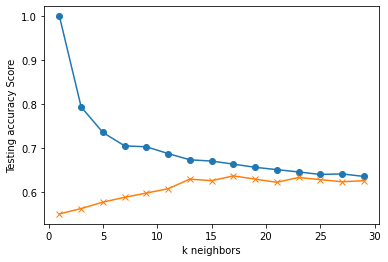

In [35]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 30, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 30, 2), train_scores, marker='o')
plt.plot(range(1, 30, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [36]:
# Note that k: 13 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train_scaled, y_train)
print('k=17 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=17 Test Acc: 0.636


In [37]:
target = model_df["Potability"]
target_names = ["non-potable", "potable"]

In [38]:
data = model_df.drop("Potability", axis=1)
feature_names = data.columns
data.head()

,ph,Hd,Sd,Cl,Sf,Cd,Oc,Tm,Tb
0,0.000000,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135
1,3.716080,129.422921,18630.057858,6.635246,0.000000,592.885359,15.180013,56.329076,4.500656
2,8.099124,224.236259,19909.541732,9.275884,0.000000,418.606213,16.868637,66.420093,3.055934
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075


In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [40]:
# Support vector machine linear classifier
from sklearn.svm import SVC 
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

In [41]:
# Model Accuracy
print('Test Acc: %.3f' % model.score(X_test, y_test))

Test Acc: 0.615


In [42]:
# Calculate classification report
from sklearn.metrics import classification_report
predictions = model.predict(X_test)
print(classification_report(y_test, predictions,
                            target_names=target_names))

              precision    recall  f1-score   support

 non-potable       0.62      0.98      0.76       510
     potable       0.33      0.02      0.04       309

    accuracy                           0.62       819
   macro avg       0.48      0.50      0.40       819
weighted avg       0.51      0.62      0.49       819



In [57]:
from sklearn.neighbors import KNeighborsClassifier

In [58]:
target = model_df["Potability"]
target_names = ["non-potable", "potable"]

In [59]:
data = model_df.drop("Potability", axis=1)
feature_names = data.columns
data.head()

,ph,Hd,Sd,Cl,Sf,Cd,Oc,Tm,Tb
0,0.000000,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135
1,3.716080,129.422921,18630.057858,6.635246,0.000000,592.885359,15.180013,56.329076,4.500656
2,8.099124,224.236259,19909.541732,9.275884,0.000000,418.606213,16.868637,66.420093,3.055934
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075


In [60]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [61]:
# Support vector machine linear classifier
from sklearn.svm import SVC 
model = SVC(kernel='linear')
model

SVC(kernel='linear')

In [62]:
classifier.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [54]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10],
              'gamma': [0.0001, 0.001, 0.01]}
grid = GridSearchCV(data, param_grid, verbose=3)

In [63]:
# Fit the model using the grid search estimator. 
# This will take the SVC model and try each combination of parameters
# grid.fit(X_train, y_train)

In [64]:
# print(grid.best_params_)